<a href="https://colab.research.google.com/github/niralishah01/122_NiraliShah/blob/main/Lab4/lab4_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
#one hot encoding of features 

le=preprocessing.LabelEncoder()

dummy_outlook=pd.get_dummies(Outlook)
print(dummy_outlook)
dummy_temperature=pd.get_dummies(Temperature)
print(dummy_temperature)
dummy_humidity=pd.get_dummies(Humidity)
print(dummy_humidity)
dummy_wind=pd.get_dummies(Wind)
print(dummy_wind)

class_encoded=le.fit_transform(Play)
print(class_encoded)

    Overcast  Rainy  Sunny
0          0      1      0
1          0      1      0
2          1      0      0
3          0      0      1
4          0      0      1
5          0      0      1
6          1      0      0
7          0      1      0
8          0      1      0
9          0      0      1
10         0      1      0
11         1      0      0
12         1      0      0
13         0      0      1
    Cool  Hot  Mild
0      0    1     0
1      0    1     0
2      0    1     0
3      0    0     1
4      1    0     0
5      1    0     0
6      1    0     0
7      0    0     1
8      1    0     0
9      0    0     1
10     0    0     1
11     0    0     1
12     0    1     0
13     0    0     1
    High  Normal
0      1       0
1      1       0
2      1       0
3      1       0
4      0       1
5      0       1
6      0       1
7      1       0
8      0       1
9      0       1
10     0       1
11     1       0
12     0       1
13     1       0
    False  True
0       1     0
1       

In [ ]:
#preparing dataset using encoded features
dataset=pd.concat([dummy_outlook,dummy_temperature,dummy_humidity,dummy_wind],axis=1)
print(dataset)
print(class_encoded)

    Overcast  Rainy  Sunny  Cool  Hot  Mild  High  Normal  False  True
0          0      1      0     0    1     0     1       0      1     0
1          0      1      0     0    1     0     1       0      0     1
2          1      0      0     0    1     0     1       0      1     0
3          0      0      1     0    0     1     1       0      1     0
4          0      0      1     1    0     0     0       1      1     0
5          0      0      1     1    0     0     0       1      0     1
6          1      0      0     1    0     0     0       1      0     1
7          0      1      0     0    0     1     1       0      1     0
8          0      1      0     1    0     0     0       1      1     0
9          0      0      1     0    0     1     0       1      1     0
10         0      1      0     0    0     1     0       1      0     1
11         1      0      0     0    0     1     1       0      0     1
12         1      0      0     0    1     0     0       1      1     0
13    

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset,class_encoded, test_size = 0.15,random_state=59)
print(X_train)
#with random_state=122(rollno), model accuracy is shown as 0. That's why I have used random_state=59(ID).

    Overcast  Rainy  Sunny  Cool  Hot  Mild  High  Normal  False  True
4          0      0      1     1    0     0     0       1      1     0
6          1      0      0     1    0     0     0       1      0     1
8          0      1      0     1    0     0     0       1      1     0
3          0      0      1     0    0     1     1       0      1     0
11         1      0      0     0    0     1     1       0      0     1
0          0      1      0     0    1     0     1       0      1     0
9          0      0      1     0    0     1     0       1      1     0
5          0      0      1     1    0     0     0       1      0     1
7          0      1      0     0    0     1     1       0      1     0
12         1      0      0     0    1     0     0       1      1     0
1          0      1      0     0    1     0     1       0      0     1


In [23]:
#create DecisionTree model
dtc=DecisionTreeClassifier(criterion="gini",random_state=122,max_leaf_nodes=122)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=122,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=122, splitter='best')

In [24]:
pred_op=dtc.predict(X_test)
print(X_test)
print("predicted output: ",pred_op)
print("actual test output: ",Y_test)

    Overcast  Rainy  Sunny  Cool  Hot  Mild  High  Normal  False  True
2          1      0      0     0    1     0     1       0      1     0
10         0      1      0     0    0     1     0       1      0     1
13         0      0      1     0    0     1     1       0      0     1
predicted output:  [1 0 0]
actual test output:  [1 1 0]


In [25]:
from sklearn import metrics
print("Accuracy is :- ",metrics.accuracy_score(Y_test, pred_op))

Accuracy is :-  0.6666666666666666


In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(Y_test, pred_op)
recall = recall_score(Y_test, pred_op)

print("precision :- ",precision)
print("recall :- ",recall)

precision :-  1.0
recall :-  0.5


In [27]:
#outlook(O,R,S) temp(C,H,M) humidity(H,N) wind(F,T)

#1. outlook=Rainy, temp=mild, humidity=normal, wind=false[(010)(001)(01)(010)]
output=dtc.predict([[0,1,0, 0,0,1, 0,1, 1,0]])
print("if outlook=rainy, temperature=mild, humidity=normal, wind=false Play=",output)

#2. outlook=sunny, temp=cool, humidity=high, wind=true[(001)(100)(01)(001)]
output=dtc.predict([[0,0,1, 1,0,0, 1,0, 0,1]])
print("if outlook=sunny, temperature=cool, humidity=high, wind=true Play=",output)

if outlook=rainy, temperature=mild, humidity=normal, wind=false Play= [0]
if outlook=sunny, temperature=cool, humidity=high, wind=true Play= [0]


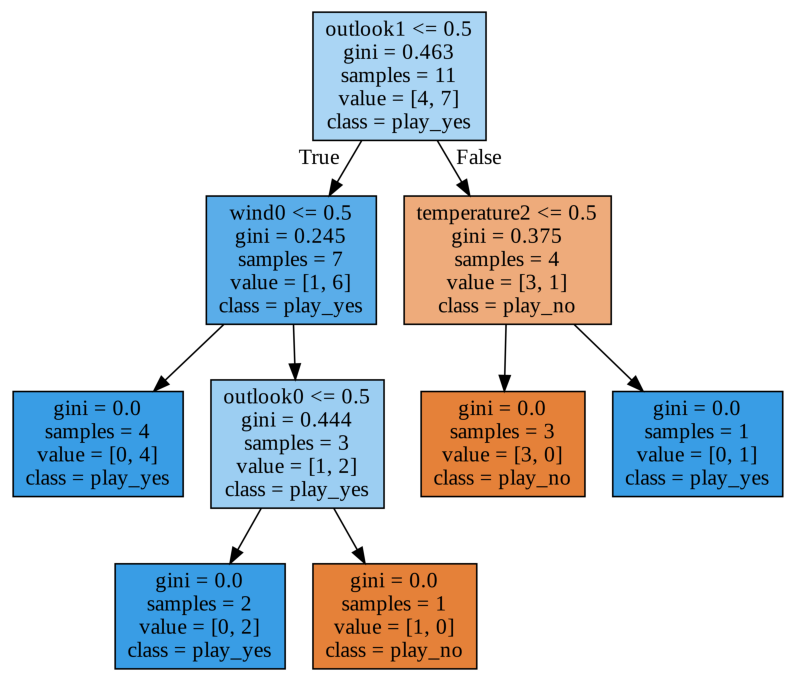

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(dtc,out_file='tree_gini.dot',
              feature_names=['outlook2','outlook1','outlook0','temperature2','temperature1','temperature0','humidity1','humidity0','wind1','wind0'],
               class_names=['play_no','play_yes'], 
              filled=True)

#convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_gini.dot', '-o', 'tree_gini.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_gini.png'))
plt.axis('off');
plt.show();

Confusion matrix:
[[1 0]
 [1 1]]


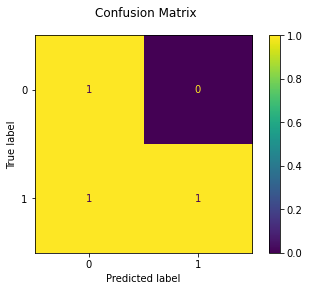

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, pred_op)
disp = metrics.plot_confusion_matrix(dtc, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()